<a href="https://colab.research.google.com/github/saisushantht/Iris-Flowers-Classification-/blob/master/Iris_Flowers_Classification_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

With Sequential model from Keras

In [1]:
from keras.models import Sequential   #type of model
from keras.layers import Dense             #how we add layer to Sequential model
from keras.utils import to_categorical     #to convert the numbers (labels) in proper vectors  

from sklearn.datasets import load_iris  #function from sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


Importing the dataset through different way i.e through sklearn library

In [2]:
data = load_iris()     #Load and return the iris dataset 
type(data)

sklearn.utils.Bunch

In [5]:
X = preprocessing.scale( data['data'] )
Y = to_categorical( data['target'] )


In [6]:
print(X.shape)
print(Y.shape)

(150, 4)
(150, 3)


splitting the dataset

In [7]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(105, 4)
(45, 4)
(105, 3)
(45, 3)


Model

The sequential model is a linear stack of layers.
i.e  sequential  allows us to create models layer-by-layer.



---
activation function is a function that is added into an artificial neural network in order to help the network learn complex patterns in the data. 
It takes in the output signal from the previous cell and converts it into some form that can be taken as input to the next cell.
---
***ReLU function***

ReLu is a non-linear activation function that is used in multi-layer neural networks or deep neural networks. This function can be represented as: 
f(x)=max(0,x)
```
def relu_function(x):
    if x<0:
        return 0
    else:
        return x
```
        
---

***Softmax function***

Softmax function is often described as a combination of multiple sigmoids.
The softmax function can be used for multiclass classification problems. This function returns the probability for a datapoint belonging to each individual class.

```
def softmax_function(x):
    z = np.exp(x)
    z_ = z/z.sum()
    return z_
```
---
Optimizers are algorithms or methods used to change the attributes of your neural network such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.


---
***Adam optimization***
algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.


---
A loss function is used to optimize the parameter values in a neural network model.


---
***Categorical crossentropy***
 is a loss function that is used in multi-class classification tasks. These are tasks where an example can only belong to one out of many possible categories, and the model must decide which one.


---
metrics are used to evaluate different Machine Learning Algorithms. 


In [9]:
model = Sequential()                      
model.add(Dense(10,input_dim=4,activation='relu'))       #adding the layers
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy' , optimizer='adam' ,metrics=['accuracy'])      #to compile the model


In [10]:
model.summary()         #to known about our model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 83
Trainable params: 83
Non-trainable params: 0
_________________________________________________________________


Fittting the model

In [11]:
history  = model.fit(X_train , Y_train , validation_data=(X_test,Y_test),epochs=200, batch_size=10)

Train on 105 samples, validate on 45 samples
Epoch 1/200
105/105 [==============================] - 0s 3ms/step - loss: 1.7022 - accuracy: 0.2190 - val_loss: 1.5421 - val_accuracy: 0.2222
Epoch 2/200
105/105 [==============================] - 0s 189us/step - loss: 1.5836 - accuracy: 0.2190 - val_loss: 1.4609 - val_accuracy: 0.2222
Epoch 3/200
105/105 [==============================] - 0s 175us/step - loss: 1.4763 - accuracy: 0.2190 - val_loss: 1.3864 - val_accuracy: 0.2222
Epoch 4/200
105/105 [==============================] - 0s 177us/step - loss: 1.3842 - accuracy: 0.2190 - val_loss: 1.3180 - val_accuracy: 0.2222
Epoch 5/200
105/105 [==============================] - 0s 171us/step - loss: 1.2965 - accuracy: 0.2381 - val_loss: 1.2577 - val_accuracy: 0.3333
Epoch 6/200
105/105 [==============================] - 0s 240us/step - loss: 1.2209 - accuracy: 0.4381 - val_loss: 1.2019 - val_accuracy: 0.4000
Epoch 7/200
105/105 [==============================] - 0s 206us/step - loss: 1.1527 - a

In [12]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


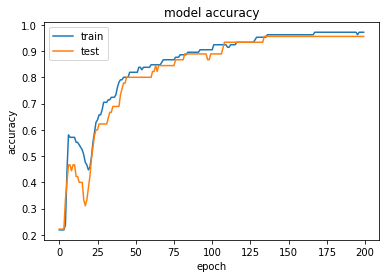

In [13]:

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

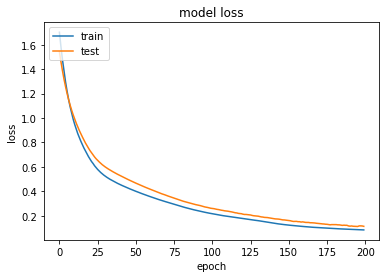

In [14]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()